# Numpy Implementation

## Load Data  and Filter Bands that are tagged Post Punk

In [154]:
import re
import pandas as pd
import numpy as np
from scipy import sparse

In [189]:
dataPath = '/Users/yantrams/Downloads/Lastfm-ArtistTags2007/ArtistTags.dat'
data = pd.read_csv(dataPath, delimiter='<sep>', header=None, engine='python')
data = data.iloc[:,1:]
allDump = data.copy()
allBands = sorted(set(data[1]))
postPunkData = data[data[2].str.contains(r'[pP]ost[ \-]*[pP]unk', na=False)]
postPunkBands = sorted(set(postPunkData[1]))
postPunkRaw = data[data[1].isin(postPunkBands)]
postPunkRaw = postPunkRaw.fillna('zx')
postPunkRaw[2] = postPunkRaw[2].apply(lambda x: x.lower().strip())
postPunkRaw[2] = postPunkRaw[2].apply(lambda x: re.sub(' +',' ',x))
postPunkRaw[2] = postPunkRaw[2].apply(lambda x: re.sub(' +\- +','-',x))

genres = list(sorted(set(postPunkRaw[2])))

In [191]:
postPunkRaw[(postPunkRaw[1] == 'Joy Division') & (postPunkRaw[3]==14)]

,1,2,3
575566,Joy Division,love,14
575594,Joy Division,electro,14
575598,Joy Division,england,14
575602,Joy Division,factory,14


## Fix Genre Names

In [156]:
duplicates = []
compoundGenres = list(filter(lambda x: ' ' in x or '-' in x, genres))
fixedCompounds = [genre.replace('-','').replace(' ','') for genre in compoundGenres]

monoGenres = set(genres) - set(compoundGenres)

for index, genre in enumerate(fixedCompounds):
    if genre in monoGenres:
        duplicates.append((genre, compoundGenres[index]))
        
monoComposites = [genre[0] for genre in duplicates]
composites = [genre[1] for genre in duplicates if '-' in genre[1]]

In [157]:
genres = sorted(set(postPunkRaw[2]))
postPunkBands = sorted(set(postPunkRaw[1]))

In [151]:
duplicates

[('m', '- m'),
 ('indie', '---indie---'),
 ('rock', '---rock---'),
 ('a', '-a-'),
 ('alt', '-alt'),
 ('exp', '-exp'),
 ('get', '-get'),
 ('indie', '-indie'),
 ('pnk', '-pnk'),
 ('punk', '-punk'),
 ('2tone', '2 tone'),
 ('2tone', '2-tone'),
 ('77punkrock', '77 punk rock'),
 ('8bit', '8 bit'),
 ('8bit', '8-bit'),
 ('80s', '80-s'),
 ('80spop', '80s pop'),
 ('80srock', '80s rock'),
 (':playlist666:', ': playlist666 :'),
 ('aa', 'a a'),
 ('aha', 'a-ha'),
 ('acdc', 'ac-dc'),
 ('adamilea', 'ada milea'),
 ('aferecords', 'afe records'),
 ('aggrotech', 'aggro-tech'),
 ('agitpop', 'agit pop'),
 ('alicenine', 'alice nine'),
 ('alltime', 'all time'),
 ('alltimefavs', 'all time favs'),
 ('allgirl', 'all-girl'),
 ('alltimefavs', 'all-time-favs'),
 ('altcountry', 'alt country'),
 ('altfolk', 'alt folk'),
 ('altpop', 'alt pop'),
 ('altrock', 'alt rock'),
 ('altcountry', 'alt-country'),
 ('altfolk', 'alt-folk'),
 ('altpop', 'alt-pop'),
 ('altrock', 'alt-rock'),
 ('alternativerock', 'alternative rock'),


In [95]:
monoComposites

['m',
 'indie',
 'rock',
 'a',
 'alt',
 'exp',
 'get',
 'indie',
 'pnk',
 'punk',
 '2tone',
 '2tone',
 '77punkrock',
 '8bit',
 '8bit',
 '80s',
 '80spop',
 '80srock',
 ':playlist666:',
 'aa',
 'aha',
 'acdc',
 'adamilea',
 'aferecords',
 'aggrotech',
 'agitpop',
 'alicenine',
 'alltime',
 'alltimefavs',
 'allgirl',
 'alltimefavs',
 'altfolk',
 'altcountry',
 'altfolk',
 'altpop',
 'altrock',
 'altcountry',
 'altfolk',
 'altpop',
 'altrock',
 'alternativerock',
 'alternativerock',
 'alternativerock',
 'anacarolina',
 'anarchofolk',
 'anarchopunk',
 'anarchofolk',
 'anarchopunk',
 'antmusic',
 'antifolk',
 'anticapitalist',
 'antifolk',
 'anytime',
 'artcore',
 'artpunk',
 'artrock',
 'artpunk',
 'artrock',
 'artiststocheckout',
 'asianmassive',
 'austropop',
 'avantgarde',
 'avantpop',
 'avantgard',
 'avantgarde',
 'avantgrade',
 'avanthop',
 'avantpop',
 'awesomesauce',
 'awesomecore',
 'brock',
 'bt',
 'badass',
 'badenpowell',
 'batcave',
 'beardpunk',
 'beatbox',
 'beenthere',
 'best

In [103]:
composites

['- m',
 '---indie---',
 '---rock---',
 '-a-',
 '-alt',
 '-exp',
 '-get',
 '-indie',
 '-pnk',
 '-punk',
 '2-tone',
 '8-bit',
 '80-s',
 'a-ha',
 'ac-dc',
 'aggro-tech',
 'all-girl',
 'all-time-favs',
 'alt - folk',
 'alt-country',
 'alt-folk',
 'alt-pop',
 'alt-rock',
 'alternative - rock',
 'alternative-rock',
 'anarcho-folk',
 'anarcho-punk',
 'anti-capitalist',
 'anti-folk',
 'art-punk',
 'art-rock',
 'avant-gard',
 'avant-garde',
 'avant-grade',
 'avant-hop',
 'avant-pop',
 'awesome-core',
 'b-rock',
 'b-t',
 'big-beat',
 'black-metal',
 'blink-182',
 'blues-rock',
 'bossa-nova',
 'break-beat',
 'break-core',
 'brit-music',
 'brit-pop',
 'brit-rock',
 'c-86',
 'chick-rock',
 'chill-out',
 'chill-pill',
 'classic-rock',
 'cold-wave',
 'country - rock',
 'country-rock',
 'cross-over',
 'crust-punk',
 'cut-up',
 'cyber-punk',
 'd-beat',
 'dance-core',
 'dance-pop',
 'dance-punk',
 'dance-rock',
 'dance-y',
 'dark-folk',
 'dark-wave',
 'de-vision',
 'death-grind',
 'death-punk',
 'death

In [158]:
l = [element[0] for element in duplicates]
duDuplicates = set([x[1] for x in duplicates if l.count(x[0]) > 1])
duDuplicates = set([element.replace('-',' ').strip() for element in duDuplicates])

In [153]:
duDuplicates

{'2 tone',
 '8 bit',
 'all time favs',
 'alt country',
 'alt folk',
 'alt pop',
 'alt rock',
 'alternative rock',
 'anarcho folk',
 'anarcho punk',
 'anti folk',
 'art punk',
 'art rock',
 'avant garde',
 'avant pop',
 'big beat',
 'black metal',
 'blink 182',
 'blues rock',
 'bossa nova',
 'break beat',
 'brit pop',
 'brit rock',
 'chick rock',
 'chill out',
 'classic rock',
 'cold wave',
 'country rock',
 'cross over',
 'crust punk',
 'd beat',
 'dance pop',
 'dance punk',
 'dance rock',
 'dark folk',
 'dark wave',
 'de vision',
 'death punk',
 'death rock',
 'deutsch punk',
 'disco punk',
 'down tempo',
 'dream pop',
 'drill n bass',
 'drum n bass',
 'electro acoustic',
 'electro clash',
 'electro dark',
 'electro folk',
 'electro goth',
 'electro house',
 'electro indie',
 'electro jazz',
 'electro pop',
 'electro punk',
 'electro rock',
 'elektro rock',
 'emo core',
 'emo pop',
 'emo punk',
 'emo rock',
 'emo violence',
 'euro dance',
 'euro pop',
 'feel good',
 'folk punk',
 'fol

In [159]:
def fixGenres(cellValue):
    if cellValue in monoComposites:
        return duplicates[monoComposites.index(cellValue)][1]
    else:
        return cellValue
    
def fixDashes(cellValue):
    if cellValue in composites:
        return cellValue.replace('-', ' ')
    else:
        return cellValue
    
def hyphenBlast(cellValue):
    if '-' in cellValue:
        return cellValue.replace('-', ' ')
    else:
        return cellValue 
    
def replaceArtistNames(cellValue):
    return postPunkBands.index(cellValue)

def replaceGenreNames(cellValue):
    return genres.index(cellValue)

In [160]:
postPunkRaw[2] = postPunkRaw[2].apply(fixGenres)
postPunkRaw[2] = postPunkRaw[2].apply(fixDashes)
postPunkRaw[2] = postPunkRaw[2].apply(hyphenBlast)

In [161]:
postPunkRaw[2] = postPunkRaw[2].apply(lambda x: x.strip())

In [162]:
genres = sorted(set(postPunkRaw[2]))
postPunkBands = sorted(set(postPunkRaw[1]))

In [173]:
list(filter(lambda x: x + ' rock' in genres, genres))

['00s',
 '2005',
 "60's",
 '60s',
 '60s and 70s',
 '60s pop',
 '70s',
 '77 punk',
 '80s indie',
 '90s',
 '90s alternative',
 '90s indie',
 'accoustic',
 'acid',
 'acoustic',
 'add',
 'adult',
 'adult alternative',
 'adult alternative pop',
 'aesop',
 'albion',
 'alcohol',
 'alernative',
 'alt',
 'alt pop',
 'alternativ',
 'alternative',
 'alternative country',
 'alternative indie',
 'alternative metal',
 'alternative pop',
 'ambient',
 'american',
 'american trad',
 'american underground',
 'angst',
 'anti',
 'apocalyptic',
 'arabesque',
 'argentina',
 'art',
 'art school',
 'asia',
 'asian',
 'atmospheric',
 'aussie',
 'australian',
 'avant',
 'avant garde',
 'awesome',
 'b',
 'bahia',
 'ballad',
 'basic',
 'beard',
 'belgian',
 'best',
 'black',
 'bleak',
 'blues',
 'boston',
 'brasil',
 'brazilian',
 'brighton',
 'brilliant',
 'brit',
 'brit pop',
 'british',
 'british folk',
 'british pop',
 'british punk',
 'bubblegum',
 'cabaret',
 'canadian',
 'canadian indie',
 'casio',
 'cello

In [174]:
list(filter(lambda x: x + ' punk' in genres, genres))

["1980's",
 '70s',
 '77',
 "80's",
 '90s',
 '90s pop',
 'acid',
 'acoustic',
 'agro',
 'alt',
 'alternative',
 'american',
 'anarchist',
 'anarcho',
 'anarcho folk',
 'anarcho ska',
 'anarchy',
 'apocalyptic',
 'art',
 'australian',
 'awesome',
 'balkan',
 'beard',
 'beat',
 'best',
 'bike',
 'blues',
 'boston',
 'brazil',
 'brazilian',
 'brit',
 'british',
 'cabaret',
 'california',
 'californian',
 'canadian',
 'cello',
 'celtic',
 'chicago',
 'chill',
 'christian',
 'circus',
 'classic',
 'clockwork',
 'comedy',
 'country',
 'cover',
 'cow',
 'crust',
 'crusty',
 'cyber',
 'cyco',
 'dance',
 'dancy',
 'dc',
 'death',
 'desert',
 'deutsch',
 'digital',
 'dischord',
 'disco',
 'diy',
 'drunk',
 'early',
 'east bay',
 'eesti',
 'electronic',
 'elektro',
 'eletro',
 'emo',
 'emo hardcore',
 'emotional',
 'existential',
 'experimental',
 'fanfare',
 'fast',
 'female',
 'feminist',
 'finnish',
 'finnish hardcore',
 'first wave',
 'folk',
 'fun',
 'funk',
 'funk rock',
 'funny',
 'g',
 'ga

In [164]:
postPunkRaw = postPunkRaw.sort_values(1)

In [165]:
dump = postPunkRaw.copy()

In [183]:
dump[(dump[1]=='Joy Division') & (dump[2]=="post punk")]

,1,2,3
575635,Joy Division,post punk,16
575633,Joy Division,post punk,1867
575569,Joy Division,post punk,163


In [188]:
qw = dump[dump[1]=='Joy Division']
#qw.groupby([2]).groups['post punk']
dict(qw.groupby(2)[3].sum())

{'70s': 32,
 '80 s': 606,
 'alternative': 519,
 'alternative rock': 70,
 'ambient': 19,
 'awesome': 8,
 'blues': 10,
 'brit pop': 41,
 'brit rock': 10,
 'british': 130,
 'brooding': 7,
 'chill out': 13,
 'classic': 11,
 'classic rock': 53,
 'cold': 8,
 'cold wave': 29,
 'dance': 13,
 'dark': 60,
 'dark wave': 52,
 'death rock': 8,
 'depressing': 25,
 'dub': 7,
 'e l e c t r o': 14,
 'ebm': 11,
 'electronic': 93,
 'electronica': 52,
 'emo': 17,
 'england': 14,
 'english': 16,
 'experimental': 30,
 'factory': 14,
 'factory records': 17,
 'favorite': 12,
 'favorite artists': 12,
 'favorite bands': 7,
 'favorites': 28,
 'favourite': 9,
 'favourite artists': 7,
 'favourite bands': 7,
 'favourites': 30,
 'female vocalists': 10,
 'folk': 15,
 'funk': 12,
 'gloomy': 13,
 'goth': 152,
 'goth rock': 26,
 'gothic': 323,
 'gothic rock': 67,
 'great lyricists': 9,
 'grunge': 11,
 'guitar': 8,
 'hard core': 15,
 'hard rock': 10,
 'hip hop': 16,
 'idm': 9,
 'indie': 547,
 'indie pop': 26,
 'indie roc

In [166]:
postPunkRaw[1] = postPunkRaw[1].apply(replaceArtistNames)
postPunkRaw[2] = postPunkRaw[2].apply(replaceGenreNames)

In [ ]:
#genres = list(map(lambda x: x.strip(), sorted(set(postPunkRaw[2]))))

## Convert the Dataframe to Numpy Arrays

In [14]:
x = postPunkRaw[1].value_counts()
y = [x[i] for i in range(len(x))]

In [171]:
len(postPunkRaw[1].value_counts())

2116

In [16]:
f = postPunkRaw.iloc[0:3,1:3]
list(zip(f[2], f[3]))

[(7539, 35), (14897, 4), (14547, 4)]

In [17]:
p = [sum(y[:i]) for i in range(len(y))]
q = [(element, p[index+1]) for index, element in enumerate(p[:-1])]

In [19]:
vectors = np.array([np.zeros(26922) for element in range(2116) ])

In [20]:
for index, indices in enumerate(q):
    temp = postPunkRaw.iloc[indices[0]:indices[1],1:3]
    tempo = zip(temp[2], temp[3])
    
    for ranges in tempo:
        vectors[index][ranges[0]] = ranges[1]
    

In [89]:
sum(vectors[1])

2914.0

In [88]:
perPunk = []
for distro in vectors:
    

array([[   0.,    0.,  345., ...,    0.,    0.,    0.],
       [   0.,    0.,  694., ...,    0.,    0.,    0.],
       [   0.,    0.,    1., ...,    0.,    0.,    0.],
       ..., 
       [   0.,    0.,    1., ...,    0.,    0.,    0.],
       [   0.,    0.,    1., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.]])

## SVD

In [ ]:
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import normalize 

svd = TruncatedSVD(n_components=100)
embedded_coords = normalize(svd.fit_transform(adj), norm='l1')
print embedded_coords.shape

## Sparse Matrix

In [25]:
matrix = np.matrix(vectors)

In [37]:
sparseMatrix = sparse.csr_matrix(matrix)

In [50]:
sparseMatrix.shape

(2116, 26950)

## SVD

In [51]:
from sklearn.decomposition import TruncatedSVD 
from sklearn.preprocessing import normalize 

svd = TruncatedSVD(n_components=100)
embedded_coords = normalize(svd.fit_transform(sparseMatrix), norm='l1')
print(embedded_coords.shape)

(2116, 100)


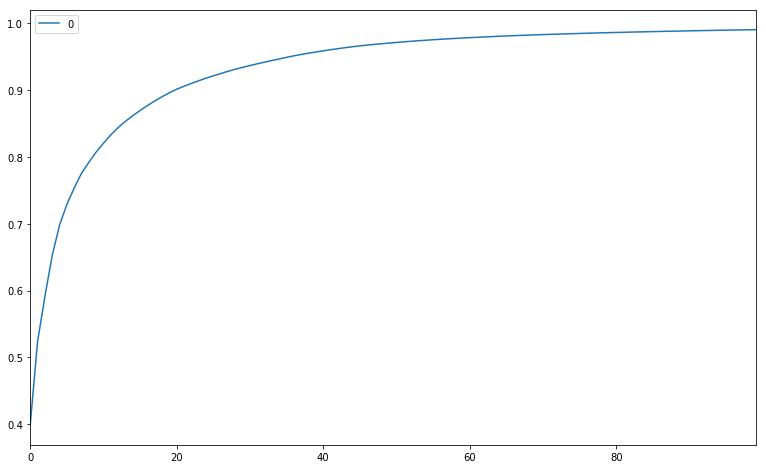

In [52]:
%matplotlib inline
pd.DataFrame(np.cumsum(svd.explained_variance_ratio_)).plot(figsize=(13, 8))

In [ ]:
import bokeh.plotting as bp
from bokeh.objects import HoverTool 
bp.output_notebook()
row_selector = np.where(users_per_subreddit>100)

## SVD Testing

In [44]:
pd.read_csv("/Users/yantrams/Downloads/allFiles/reddituserpostingbehavior.csv", nrows=10, names=["user"]+list(range(25))).fillna("")


,user,0,1,2,3,4,5,6,7,8,...,15,16,17,18,19,20,21,22,23,24
0,603,politics,trees,pics,,,,,,,...,,,,,,,,,,
1,604,Metal,AskReddit,tattoos,redditguild,WTF,cocktails,pics,funny,gaming,...,trackers,Minecraft,gainit,,,,,,,
2,605,politics,IAmA,AdviceAnimals,movies,smallbusiness,Republican,todayilearned,AskReddit,WTF,...,atheism,Jeep,Music,grandrapids,reddit.com,videos,yoga,GetMotivated,bestof,ShitRedditSays
3,606,CrohnsDisease,birthcontrol,IAmA,AdviceAnimals,AskReddit,Endo,WTF,TwoXChromosomes,pics,...,Cartalk,aww,,,,,,,,
4,607,space,Fitment,cars,Economics,Libertarian,240sx,UserCars,AskReddit,WTF,...,Drifting,Justrolledintotheshop,atheism,gadgets,videos,business,gamernews,Cartalk,worldnews,carporn
5,608,politics,Flagstaff,Rainmeter,fffffffuuuuuuuuuuuu,pcgaming,screenshots,truegaming,AdviceAnimals,Guildwars2,...,SuggestALaptop,battlefield3,WTF,starcraft,creepy,pics,funny,darksouls,books,gaming
6,609,Clarinet,AdviceAnimals,festivals,SubredditDrama,InternetAMA,AskReddit,aves,cringe,MemesIRL,...,,,,,,,,,,
7,610,RedHotChiliPeppers,fffffffuuuuuuuuuuuu,tifu,civ,gameofthrones,IAmA,AdviceAnimals,movies,explainlikeimfive,...,skyrim,WTF,germany,pics,funny,seduction,circlebroke,sto,gaming,4chan
8,611,beertrade,AskReddit,WTF,beer,batman,BBQ,beerporn,Homebrewing,,...,,,,,,,,,,
9,612,politics,2012Elections,Parenting,IAmA,fresno,picrequests,AskReddit,loseit,WTF,...,RedditLaqueristas,atheism,LadyBoners,GradSchool,,,,,,


In [53]:
user_ids = []
subreddit_ids = []
subreddit_to_id = {}
i=0
with open("/Users/yantrams/Downloads/allFiles/reddituserpostingbehavior.csv", 'r') as f:
    for line in f:
        for sr in line.rstrip().split(",")[1:]: 
            if sr not in subreddit_to_id: 
                subreddit_to_id[sr] = len(subreddit_to_id)
            user_ids.append(i)
            subreddit_ids.append(subreddit_to_id[sr])
        i+=1

In [54]:
user_ids

[0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 1

In [56]:
subreddit_to_id

{'politics': 0,
 'trees': 1,
 'pics': 2,
 'Metal': 3,
 'AskReddit': 4,
 'tattoos': 5,
 'redditguild': 6,
 'WTF': 7,
 'cocktails': 8,
 'funny': 9,
 'gaming': 10,
 'Fitness': 11,
 'mcservers': 12,
 'TeraOnline': 13,
 'GetMotivated': 14,
 'itookapicture': 15,
 'Paleo': 16,
 'trackers': 17,
 'Minecraft': 18,
 'gainit': 19,
 'IAmA': 20,
 'AdviceAnimals': 21,
 'movies': 22,
 'smallbusiness': 23,
 'Republican': 24,
 'todayilearned': 25,
 'IWantOut': 26,
 'DIY': 27,
 'Frugal': 28,
 'relationships': 29,
 'atheism': 30,
 'Jeep': 31,
 'Music': 32,
 'grandrapids': 33,
 'reddit.com': 34,
 'videos': 35,
 'yoga': 36,
 'bestof': 37,
 'ShitRedditSays': 38,
 'gifs': 39,
 'technology': 40,
 'aww': 41,
 'CrohnsDisease': 42,
 'birthcontrol': 43,
 'Endo': 44,
 'TwoXChromosomes': 45,
 'Mustang': 46,
 '4x4': 47,
 'CCW': 48,
 'dogpictures': 49,
 'Cartalk': 50,
 'space': 51,
 'Fitment': 52,
 'cars': 53,
 'Economics': 54,
 'Libertarian': 55,
 '240sx': 56,
 'UserCars': 57,
 'Autos': 58,
 'formula1': 59,
 'bodybui

In [55]:
subreddit_ids

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 2,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 0,
 20,
 21,
 22,
 23,
 24,
 25,
 4,
 7,
 26,
 2,
 9,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 14,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 20,
 21,
 4,
 44,
 7,
 45,
 2,
 9,
 31,
 46,
 47,
 48,
 49,
 50,
 41,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 4,
 7,
 58,
 59,
 2,
 9,
 60,
 10,
 61,
 62,
 30,
 63,
 35,
 64,
 65,
 50,
 66,
 67,
 40,
 68,
 69,
 70,
 0,
 71,
 72,
 73,
 74,
 75,
 76,
 21,
 77,
 78,
 79,
 80,
 4,
 81,
 82,
 83,
 84,
 7,
 85,
 86,
 2,
 9,
 87,
 88,
 10,
 89,
 90,
 91,
 30,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 39,
 99,
 100,
 101,
 40,
 18,
 41,
 102,
 103,
 104,
 105,
 21,
 106,
 107,
 108,
 4,
 109,
 110,
 111,
 32,
 112,
 113,
 114,
 115,
 73,
 116,
 117,
 118,
 20,
 21,
 22,
 119,
 107,
 78,
 25,
 1,
 4,
 120,
 82,
 7,
 121,
 2,
 9,
 122,
 123,
 124,
 10,
 125,
 30,
 126,
 32,
 127,
 128,
 35,
 129,
 130,
 17,
 66,
 39,
 131,
 101,
 40,
 70,
 132,
 133,
 4,
 7,
 134,
 135,